In [2]:
import pymysql

In [3]:
from sqlalchemy import create_engine

In [4]:
import pandas as pd

In [5]:
#define a connection string
#dialect + driver :// username: password @host :db name
connection_string = 'mysql+pymysql://root:' + 'password'  + '@localhost/sakila'
engine = create_engine(connection_string)

In [6]:
#data frame creation

df= pd.read_sql_query('Select * from sakila.film ', engine )

In [7]:
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42


In [ ]:
#Merging files

In [48]:
Dfilms=pd.read_sql_query('SELECT film_id, title, count(film_id) As times_rented FROM rental AS r JOIN inventory AS i USING(inventory_id) JOIN film AS fl USING(film_id) GROUP BY film_id ORDER BY times_rented DESC limit 10', engine)
Dfilms

,film_id,title,times_rented
0,103,BUCKET BROTHERHOOD,34
1,738,ROCKETEER MOTHER,33
2,730,RIDGEMONT SUBMARINE,32
3,382,GRIT CLOCKWORK,32
4,767,SCALAWAG DUCK,32
5,489,JUGGLER HARDLY,32
6,331,FORWARD TEMPLE,32
7,418,HOBBIT ALIEN,31
8,735,ROBBERS JOON,31
9,1000,ZORRO ARK,31


In [49]:
Dfilms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   film_id       10 non-null     int64 
 1   title         10 non-null     object
 2   times_rented  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [50]:
#Visualization

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

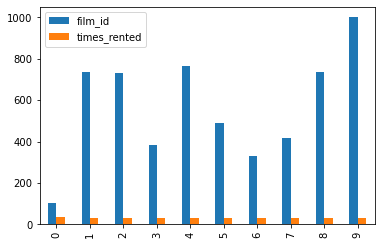

In [59]:
#explore of the film ID and times rented 
plotdata= Dfilms
plotdata.plot(kind="bar")

<AxesSubplot:xlabel='times_rented', ylabel='title'>

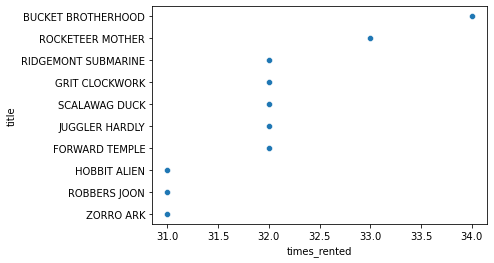

In [68]:
#Most highly rented film
sns.scatterplot(x='times_rented', y= 'title', legend = 4, data = Dfilms)

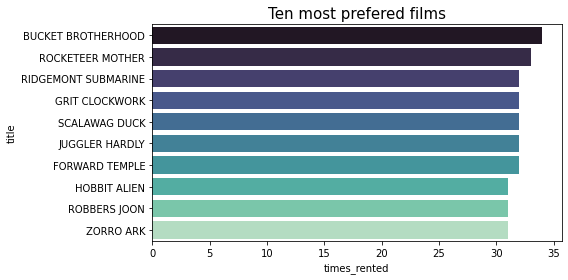

In [80]:
#What en most prefered films
plt.figure(figsize=(8,4))
sns_plot = sns.barplot(y='title',x ='times_rented', data = Dfilms, palette = "mako", order=Dfilms.sort_values('times_rented', ascending = False).title)
plt.xlabel("times_rented", size=10)
plt.ylabel("title", size=10)
plt.title("Ten most prefered films", size=15)
plt.tight_layout()

In [ ]:
#Export data frame to CSV file

In [85]:
Dfilms.to_csv("Sql_Jupyter_film.csv")